In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,NaN,NaN,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,NaN,NaN,0,10,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,18,0,0,NaN,NaN,18,148,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,2020-12-06T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,...,206,1022,29984,1759,0.0,0.0,71489,1021846,692062.0,NaN
6023,2020-12-06T17:00:00,ITA,9,Toscana,43.769231,11.255889,1360,252,1612,27587,...,-1345,753,76331,2867,0.0,0.0,108397,1645472,983103.0,NaN
6024,2020-12-06T17:00:00,ITA,10,Umbria,43.106758,12.388247,332,60,392,5673,...,-84,234,18619,460,0.0,0.0,25144,438511,231538.0,NaN
6025,2020-12-06T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,...,-69,34,5406,333,0.0,0.0,6726,55973,34644.0,NaN


In [33]:
data2=pd.to_datetime(df['data'])

In [34]:
data3=data2.dt.date

In [35]:
nuovi_deceduti=np.array(df['deceduti'])
nuovi_deceduti=np.diff(df['deceduti'])
nuovi_deceduti=np.append(0,nuovi_deceduti)
df['nuovi_deceduti']=nuovi_deceduti

In [36]:
nuovi_tamponi=np.array(df['tamponi'])
nuovi_tamponi=np.diff(df['tamponi'])
nuovi_tamponi=np.append(0,nuovi_tamponi)
nuovi_tamponi
df['nuovi_tamponi']=nuovi_tamponi

In [50]:
regione=df['denominazione_regione']=='Lombardia'
df2=df[regione]
df2

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,nuovi_deceduti,nuovi_tamponi
8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,...,0,6,NaN,NaN,172,1463,NaN,NaN,6,1462
29,2020-02-25T18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,...,0,9,NaN,NaN,240,3700,NaN,NaN,9,3661
50,2020-02-26T18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,...,0,9,NaN,NaN,258,3208,NaN,NaN,9,3142
71,2020-02-27T18:00:00,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,...,40,14,NaN,NaN,403,3320,NaN,NaN,14,3242
92,2020-02-28T18:00:00,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,...,40,17,NaN,NaN,531,4835,NaN,NaN,17,4723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,2020-12-02T17:00:00,ITA,3,Lombardia,45.466794,9.190347,7222,855,8077,110719,...,274189,22279,305002.0,110262.0,415264,4143566,2372367.0,NaN,19856,3534260
5951,2020-12-03T17:00:00,ITA,3,Lombardia,45.466794,9.190347,7025,836,7861,110470,...,278058,22626,0.0,0.0,419015,4179837,2383936.0,NaN,20177,3565574
5972,2020-12-04T17:00:00,ITA,3,Lombardia,45.466794,9.190347,6792,822,7614,109088,...,284073,22773,0.0,0.0,423548,4222113,2397885.0,NaN,20299,3603085
5993,2020-12-05T17:00:00,ITA,3,Lombardia,45.466794,9.190347,6554,805,7359,108397,...,288056,22884,0.0,0.0,426696,4253306,2407249.0,NaN,20383,3630570


In [51]:
df2.dtypes

data                             object
stato                            object
codice_regione                    int64
denominazione_regione            object
lat                             float64
long                            float64
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
note                             object
nuovi_deceduti                    int64
nuovi_tamponi                     int64
dtype: object

In [53]:
df2.reset_index()

,index,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,...,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,nuovi_deceduti,nuovi_tamponi
0,8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,...,0,6,NaN,NaN,172,1463,NaN,NaN,6,1462
1,29,2020-02-25T18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,...,0,9,NaN,NaN,240,3700,NaN,NaN,9,3661
2,50,2020-02-26T18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,...,0,9,NaN,NaN,258,3208,NaN,NaN,9,3142
3,71,2020-02-27T18:00:00,ITA,3,Lombardia,45.466794,9.190347,172,41,213,...,40,14,NaN,NaN,403,3320,NaN,NaN,14,3242
4,92,2020-02-28T18:00:00,ITA,3,Lombardia,45.466794,9.190347,235,47,282,...,40,17,NaN,NaN,531,4835,NaN,NaN,17,4723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,5930,2020-12-02T17:00:00,ITA,3,Lombardia,45.466794,9.190347,7222,855,8077,...,274189,22279,305002.0,110262.0,415264,4143566,2372367.0,NaN,19856,3534260
283,5951,2020-12-03T17:00:00,ITA,3,Lombardia,45.466794,9.190347,7025,836,7861,...,278058,22626,0.0,0.0,419015,4179837,2383936.0,NaN,20177,3565574
284,5972,2020-12-04T17:00:00,ITA,3,Lombardia,45.466794,9.190347,6792,822,7614,...,284073,22773,0.0,0.0,423548,4222113,2397885.0,NaN,20299,3603085
285,5993,2020-12-05T17:00:00,ITA,3,Lombardia,45.466794,9.190347,6554,805,7359,...,288056,22884,0.0,0.0,426696,4253306,2407249.0,NaN,20383,3630570


In [54]:
df2['terapia_intensiva'].max()

1381

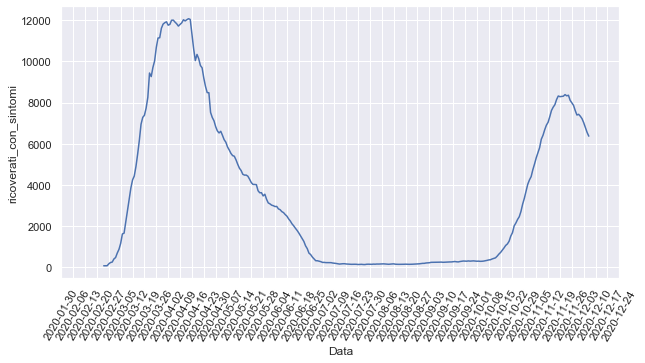

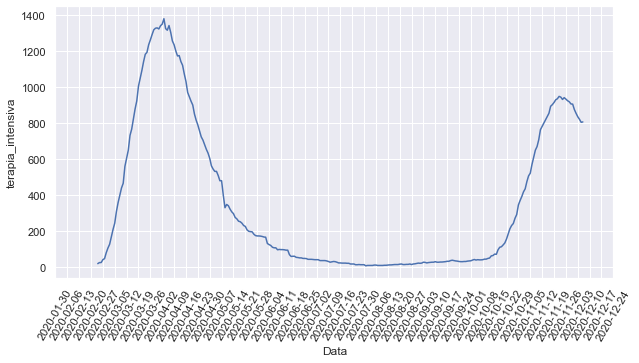

In [55]:
sns.lineplot(data=df2,y='ricoverati_con_sintomi',x=data3)
sns.set(rc={'figure.figsize':(10,5)})
plt.ylabel("ricoverati_con_sintomi")
plt.xlabel("Data")
plt.xticks(np.arange('2020-02','2021-01', 1,dtype='datetime64[W]'),rotation=60)
plt.show()
sns.lineplot(data=df2,y='terapia_intensiva',x=data3)
sns.set(rc={'figure.figsize':(10,5)})
plt.ylabel("terapia_intensiva")
plt.xlabel("Data")
plt.xticks(np.arange('2020-02','2021-01', 1,dtype='datetime64[W]'),rotation=60)
plt.show()